In [3]:
!python pretrain.py --epochs 800 --dev cuda:0 --config config/train_cs.yaml --checkpoint-dir runs/pretrain/cs/

pretrain.py --epochs 1 --dev cuda:0
Epoch:[1/1]
 23%|█████████▋                                | 34/147 [00:49<02:44,  1.46s/it]
Traceback (most recent call last):
  File "/data/UGCN/pretrain.py", line 167, in <module>
    main_worker(args.dev, args)
  File "/data/UGCN/pretrain.py", line 133, in main_worker
    optimizer.step()
  File "/data/miniconda/envs/torch/lib/python3.10/site-packages/torch/optim/optimizer.py", line 385, in wrapper
    out = func(*args, **kwargs)
  File "/data/miniconda/envs/torch/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/data/UGCN/optim/lars.py", line 29, in step
    torch.where(update_norm > 0,
KeyboardInterrupt


In [6]:
!python pretrain.py --epochs 800 --dev cuda:1 --config config/train_cv.yaml --checkpoint-dir runs/pretrain/cv/

pretrain.py --epochs 1 --dev cuda:0 --config config/train_cv.yaml --checkpoint-dir runs/pretrain/cv/
Epoch:[1/1]
  7%|███                                       | 10/138 [00:18<02:51,  1.34s/it]^C


In [17]:
!python evaluate.py --epochs 100 --dev cuda:0 --pretrained runs/pretrain/cs/stgcn_750.pth --config config/evaluate_cs.yaml --checkpoint-dir runs/evaluate/cs8/

Epoch:[1/100] Train
100%|█████████████████████████████████████████| 313/313 [00:23<00:00, 13.11it/s]
Epoch: 1 Acc@1: 70.4173322683706 Acc@5: 89.69398961661342 loss: 0.795019268989563 
Epoch:[1/100] Test
100%|█████████████████████████████████████████| 129/129 [00:09<00:00, 13.35it/s]
Epoch: 1 Acc@1: 79.55965305535914 Acc@5: 96.15454601612463 BestAcc@1: 79.55965305535914 BestAcc@5: 96.15454601612463
Epoch:[2/100] Train
100%|█████████████████████████████████████████| 313/313 [00:22<00:00, 13.63it/s]
Epoch: 2 Acc@1: 81.38228833865814 Acc@5: 96.81259984025559 loss: 0.5191659331321716 
Epoch:[2/100] Test
100%|█████████████████████████████████████████| 129/129 [00:09<00:00, 13.42it/s]
Epoch: 2 Acc@1: 80.7060107792632 Acc@5: 96.55486139855218 BestAcc@1: 80.7060107792632 BestAcc@5: 96.55486139855218
Epoch:[3/100] Train
100%|█████████████████████████████████████████| 313/313 [00:22<00:00, 13.66it/s]
Epoch: 3 Acc@1: 83.09454872204473 Acc@5: 97.3916733226837 loss: 0.7110406160354614 
Epoch:[3/100]

In [4]:
!python evaluate.py --epochs 100 --dev cuda:0 --pretrained runs/pretrain/cv/stgcn_500.pth --config config/evaluate_cv.yaml --checkpoint-dir runs/evaluate/cv5/

Epoch:[1/100] Train
100%|█████████████████████████████████████████| 294/294 [00:23<00:00, 12.71it/s]
Epoch: 1 Acc@1: 71.80590986394557 Acc@5: 90.48150510204081 loss: 0.7620990872383118 
Epoch:[1/100] Test
100%|█████████████████████████████████████████| 148/148 [00:10<00:00, 13.63it/s]
Epoch: 1 Acc@1: 82.00929642287818 Acc@5: 97.58081555039087 BestAcc@1: 82.00929642287818 BestAcc@5: 97.58081555039087
Epoch:[2/100] Train
100%|█████████████████████████████████████████| 294/294 [00:21<00:00, 13.86it/s]
Epoch: 2 Acc@1: 80.76371173469387 Acc@5: 96.49234693877551 loss: 0.7265811562538147 
Epoch:[2/100] Test
100%|█████████████████████████████████████████| 148/148 [00:10<00:00, 13.72it/s]
Epoch: 2 Acc@1: 83.79463341844125 Acc@5: 98.04035495457427 BestAcc@1: 83.79463341844125 BestAcc@5: 98.04035495457427
Epoch:[3/100] Train
100%|█████████████████████████████████████████| 294/294 [00:21<00:00, 13.87it/s]
Epoch: 3 Acc@1: 82.02593537414965 Acc@5: 96.90954506802721 loss: 0.5009219646453857 
Epoch:[3

tsne

In [10]:
import numpy as np
from sklearn.manifold import TSNE

source = np.load('data_gen/ntu/NTU60_CS.npz',mmap_mode='r')

data = source['x_test']
label = np.where(source['y_test'] > 0)[1]
data = data.reshape(data.shape[0],-1)

data_tsne = TSNE(n_components=2,perplexity=30).fit_transform(data)

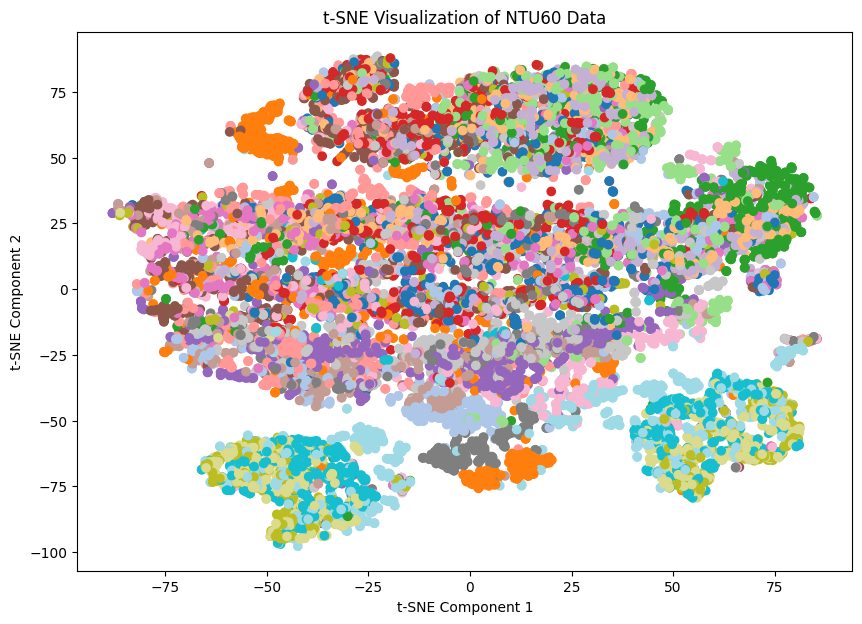

In [11]:
import matplotlib.pyplot as plt
# 可视化 t-SNE 结果
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=label, cmap='tab20', marker='o')

# 添加图例
legend1 = plt.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().add_artist(legend1)

plt.title('t-SNE Visualization of NTU60 Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [3]:
import numpy as np
data = np.load('data_gen/ntu/NTU60_CV.npz',mmap_mode='r')['x_test']

In [4]:
data.shape

(18932, 300, 150)